<a href="https://colab.research.google.com/github/TorradoSantiago/ejercicios.regresion/blob/master/REGRESION_SIMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importamos librerias para graficar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
df = "/content/drive/MyDrive/met op/LifeExpectancyData.csv"
data = pd.read_csv(df)

#EDA

In [11]:
# Limpiamos los nombres de las columnas
data.columns = data.columns.str.strip()

In [12]:
# Información básica del dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:

# Estadísticas descriptivas
print(data.describe())

              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.

In [24]:
print(data.head())

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0             

In [7]:
# Chequeamos valores nulos, si queremos usar alguna de las variables que no estan en 0 vamos a tener que hacer una limpieza de datos
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


## EXPLICACION DE VARIBALES
- Country: Nombre del país.
- Year: Año de los datos.
- Status: Estado del país en términos de ser desarrollado o en desarrollo.
- Life_Expectancy: Esperanza de vida en años.
- Adult_Mortality: Tasas de mortalidad adulta de ambos sexos (probabilidad de morir entre los 15 y los 60 años por cada 1000 habitantes).
infant.deaths: Número de muertes infantiles por cada 1000 habitantes.
- Alcohol: Consumo de alcohol per cápita registrado (mayores de 15 años) (en litros de alcohol puro).
percentage.expenditure: Gasto en salud como porcentaje del Producto Interno Bruto per cápita (%).
- Hepatitis.B: Cobertura de inmunización contra la hepatitis B (HepB) entre los niños de un año (%).
- Measles: Número de casos reportados de sarampión por cada 1000 habitantes.
- BMI: Índice de Masa Corporal promedio de la población total.
- under.five.deaths: Número de muertes de menores de cinco años por cada 1000 habitantes.
- Polio: Cobertura de inmunización contra la poliomielitis (Pol3) entre los niños de un año (%).
- Total.expenditure: Gasto gubernamental general en salud como porcentaje del - gasto gubernamental total (%).
- Diphtheria: Cobertura de inmunización contra la difteria, el tétanos y la tos ferina (DTP3) entre los niños de un año (%).
- HIV.AIDS: Muertes por VIH/SIDA por cada 1000 nacimientos vivos (de 0 a 4 años).
- GDP: Producto Interno Bruto per cápita (en USD).
- Population: Población del país.
- thinness..1.19.years: Prevalencia de delgadez entre niños y adolescentes de 10 a 19 años (%).
- thinness.5.9.years: Prevalencia de delgadez entre niños de 5 a 9 años (%).
- Income.composition.of.resources: Índice de Desarrollo Humano en términos de - composición de ingresos de los recursos (índice que varía de 0 a 1).
- Schooling: Número de años de escolaridad (años).


#REGRESIONES LINEALES

In [35]:
#importamos librerias necesariar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


##REGRESION POLIO VS ESPERANZA DE VIDA

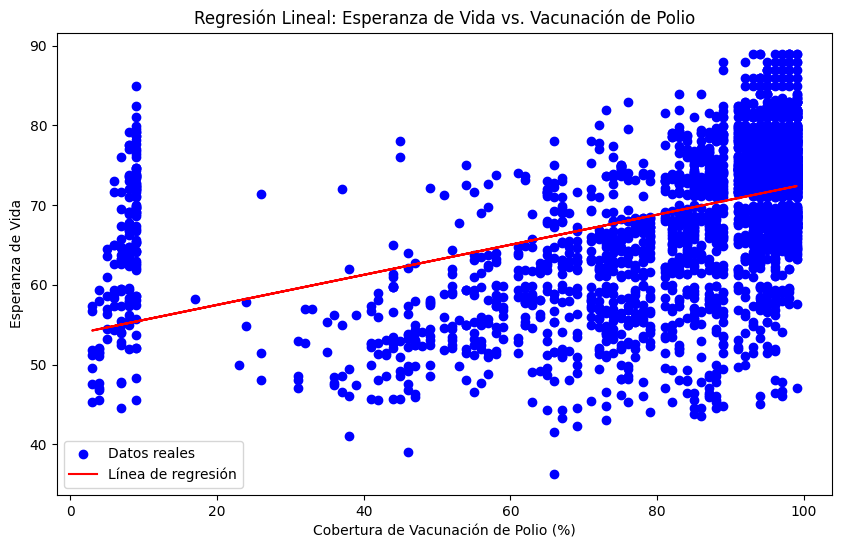

((0, 0), (0.18875576252670392, 53.70416379414748))

In [36]:
# Limpiar los valores nulos tanto de 'Polio' como de 'Esperanza de vida'
data_cleaned = data.dropna(subset=['Polio', 'Life expectancy'])

# Verificar la limpieza
nulos_despues_polio = data_cleaned['Polio'].isnull().sum()
nulos_despues_life_exp = data_cleaned['Life expectancy'].isnull().sum()

# Preparar y entrenar el modelo de regresión lineal para la variable Polio vs. Esperanza de Vida
X_polio = data_cleaned[['Polio']].values
y_EsperanzadeV = data_cleaned['Life expectancy'].values

# Crear y entrenar el modelo de regresión lineal
polio_model = LinearRegression()
polio_model.fit(X_polio, y_EsperanzadeV)

# Predicciones para el gráfico
y_pred_polio = polio_model.predict(X_polio)

# Coeficientes del modelo
coef_polio = polio_model.coef_[0]
intercept_polio = polio_model.intercept_

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_polio, y_EsperanzadeV, color='blue', label='Datos reales')  # Puntos de datos reales
plt.plot(X_polio, y_pred_polio, color='red', label='Línea de regresión')  # Línea de regresión
plt.title('Regresión Lineal: Esperanza de Vida vs. Vacunación de Polio') #titulo
plt.xlabel('Cobertura de Vacunación de Polio (%)') #eje x
plt.ylabel('Esperanza de Vida') #eje y
plt.legend()
plt.show()

(nulos_despues_polio, nulos_despues_life_exp), (coef_polio, intercept_polio)



In [37]:
# Cálculo de R²
r2 = r2_score(y_EsperanzadeV, y_pred_polio)

# Estadísticas para el análisis de significancia
slope, intercept, r_value, p_value, std_err = stats.linregress(X_polio.ravel(), y_EsperanzadeV)

# Imprimir los resultados
print(f"Coeficiente (pendiente): {slope}") #
print(f"Intercepto: {intercept}")
print(f"R^2: {r2}")
print(f"P-value: {p_value}")
print(f"Error estándar del coeficiente: {std_err}")

Coeficiente (pendiente): 0.18875576252670345
Intercepto: 53.70416379414752
R^2: 0.21674220847907943
P-value: 1.9596863997004844e-156
Error estándar del coeficiente: 0.006655157194446491


**Coeficiente:** cuánto cambia la expectativa de vida cuando más personas están vacunadas contra la polio. En este caso, cada vez que el porcentaje de vacunación aumenta en un 1%, la expectativa de vida de la gente aumenta casi 0.19 años.

**intercepto:** qué expectativa de vida podríamos esperar si nadie estuviera vacunado contra la polio, lo cual es alrededor de 53.7 años. Es una forma de saber cómo estarían las cosas sin ninguna vacunación.

**R2:** Un R2 de 1 significaria que nuestro modelo explica perfectamente la expectativa de vida basada en la cobertura de vacunación. Un R2 de 0 significaría que la cobertura de vacunación no nos dice nada sobre la expectativa de vida. En este caso nos dio 0.2, por lo que parece que poca parte de la esperanza de vida se explica por la cobertura de vacunacion contra la polio

**error estandar**: es aproximadamente 45.9% del valor del coeficiente (0.0866 / 0.1888). Esto es relativamente alto

**P-Value (significancia estadistica):** *Un p-value alto sugiere que la relación observada podría ser una ocurrencia casual si la hipótesis nula fuera cierta, lo cual no nos proporciona suficiente evidencia para rechazar la hipótesis nula.



##REGRESION Fallecimientos menores a 5 a;os vs gasto en salud y PBI per capita

In [41]:
import statsmodels.api as sm

# Limpieza de datos nulos en las columnas necesarias para el modelo con PBI
data_pbi = data.dropna(subset=['GDP', 'Life expectancy'])

# Seleccionar las variables para el modelo OLS con PBI
X_pbi = data_pbi[['GDP']]
X_pbi = sm.add_constant(X_pbi)

# Variable de respuesta
y_pbi = data_pbi['Life expectancy']

# Ajuste del modelo OLS
model_pbi = sm.OLS(y_pbi, X_pbi).fit()

# Imprimir el resumen del modelo para PBI
print("Modelo OLS con PBI:")
print(model_pbi.summary())



Modelo OLS con PBI:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     671.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          2.71e-131
Time:                        21:50:11   Log-Likelihood:                -8860.4
No. Observations:                2485   AIC:                         1.772e+04
Df Residuals:                    2483   BIC:                         1.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0350      0.194

El **coeficientede 0.0003**  indica que por cada aumento de 1 USD en el PBI per cápita, la expectativa de vida aumenta en 0.0003 años. Este efecto es estadísticamente significativo, como lo indica el valor p extremadamente bajo (menor que 0.05), y el intervalo de confianza no incluye el cero, lo que refuerza esta conclusión.

Este efecto es estadísticamente significativo, como lo indica el **valor p** bajo (menor que 0.05)

**R2 de 0.213** significa que el modelo explica el 21.3% de la variabilidad en la expectativa de vida a partir del PBI. Esto indica una relación moderada; aunque el PBI tiene un impacto significativo, hay otros muchos factores que también afectan la expectativa de vida.

El modelo muestra que el PBI per cápita tiene un impacto positivo pequeño pero estadísticamente significativo en la expectativa de vida.


In [42]:
# Limpieza de datos nulos en las columnas necesarias para el modelo con gastoSALUD
data_gastoSALUD = data.dropna(subset=['Total expenditure', 'Life expectancy'])

# Seleccionar las variables para el modelo OLS con gastoSALUD
X_gastoSALUD = data_gastoSALUD[['Total expenditure']]
X_gastoSALUD = sm.add_constant(X_gastoSALUD)

# Variable de respuesta
y_gastoSALUD = data_gastoSALUD['Life expectancy']

# Ajuste del modelo OLS
model_gastoSALUD = sm.OLS(y_gastoSALUD, X_gastoSALUD).fit()

# Imprimir el resumen del modelo para gastoSALUD
print("\nModelo OLS con gastoSALUD:")
print(model_gastoSALUD.summary())


Modelo OLS con gastoSALUD:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.88e-30
Time:                        21:50:26   Log-Likelihood:                -9859.1
No. Observations:                2702   AIC:                         1.972e+04
Df Residuals:                    2700   BIC:                         1.973e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const     

 El **coeficiente de 0.8369** indica que por cada aumento de 1% en el gasto total en salud como porcentaje del gasto gubernamental total, la expectativa de vida aumenta en 0.8369 años. Este efecto es estadísticamente significativo, como lo indica el valor p extremadamente bajo (menor que 0.05), y el intervalo de confianza que no incluye el cero, reforzando esta conclusión.

Un *** p value*** muy bajo confirma que el efecto del gasto en salud en la expectativa de vida es estadísticamente significativo.Esto implica que los incrementos en el gasto en salud están fuertemente asociados con mejoras en la expectativa de vida.

un **r2 de 0.048** significa que el modelo explica aproximadamente el 4.8% de la variabilidad en la expectativa de vida a partir del gasto en salud. Aunque este porcentaje es bastante bajo, indica que mientras el gasto en salud tiene un impacto estadísticamente significativo sobre la expectativa de vida,


El modelo muestra que el gasto en salud tiene un impacto positivo y significativo en la expectativa de vida, aunque hay otros factores que no estan incluidos que tienen influencia.